In [39]:
import pandas as pd
import matplotlib.pyplot as plt
df_airbnb = pd.read_csv("./data/airbnb.csv")

In [40]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


## 1. Realizar Análisis Exploratorio de los datos

In [41]:
# Obtener el tamaño del dataset (número de filas y columnas)
print("Shape of the dataset:", df_airbnb.shape)

# Nombres de las columnas
print("Columnas del dataset:", df_airbnb.columns)

# Información general sobre el dataset (tipos de datos, valores nulos, etc.)
print(df_airbnb.info())

Shape of the dataset: (13232, 9)
Columnas del dataset: Index(['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               13232 non-null  int64  
 1   host_id               13232 non-null  int64  
 2   room_type             13232 non-null  object 
 3   neighborhood          13232 non-null  object 
 4   reviews               13232 non-null  int64  
 5   overall_satisfaction  13222 non-null  float64
 6   accommodates          13232 non-null  int64  
 7   bedrooms              13232 non-null  float64
 8   price                 13232 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 930.5+ KB
None


# Realizar Filtrados a Datos 

In [42]:
# Caso 1: Alicia
# Filtramos apartamentos con más de 10 críticas, puntuación mayor a 4 y con al menos 2 habitaciones
alicia_filter = df_airbnb[
    (df_airbnb['reviews'] > 10) &
    (df_airbnb['overall_satisfaction'] > 4) &
    (df_airbnb['bedrooms'] >= 2)
]

# Ordenamos por puntuación y por número de críticas
alicia_sorted = alicia_filter.sort_values(by=['overall_satisfaction', 'reviews'], ascending=[False, False])

# Seleccionamos las 3 mejores opciones
alicia_options = alicia_sorted.head(3)

# Mostramos el resultado
print("Opciones para Alicia:")
print(alicia_options[['room_id', 'neighborhood', 'overall_satisfaction', 'reviews', 'price', 'bedrooms']])


Opciones para Alicia:
     room_id       neighborhood  overall_satisfaction  reviews  price  \
120   176153       Misericórdia                   5.0      438  102.0   
16     44043  Santa Maria Maior                   5.0      316   80.0   
140   202150  Santa Maria Maior                   5.0      274   62.0   

     bedrooms  
120       2.0  
16        3.0  
140       2.0  


In [43]:
# Caso 2: Roberto y Clara
# Filtramos las propiedades de Roberto (id: 97503) y Clara (id: 90387)
roberto_clara_filter = df_airbnb[df_airbnb['room_id'].isin([97503, 90387])]

# Guardamos el dataframe en un archivo Excel
roberto_clara_filter.to_excel("roberto.xlsx", index=False)

# Mostramos el resultado
print("Propiedades de Roberto y Clara:")
print(roberto_clara_filter[['room_id', 'host_id', 'reviews', 'overall_satisfaction', 'price', 'neighborhood']])


Propiedades de Roberto y Clara:
    room_id  host_id  reviews  overall_satisfaction  price   neighborhood
41    90387   490050      204                   5.0   46.0  Santo António
48    97503   515924       39                   4.0   26.0  Santo António


In [44]:
# Caso 3: Diana
# Filtramos por habitaciones dentro del presupuesto de 50€
diana_filter = df_airbnb[df_airbnb['price'] <= 50]

# Separamos las habitaciones compartidas (Shared room)
shared_rooms = diana_filter[diana_filter['room_type'] == 'Shared room'].sort_values(by='overall_satisfaction', ascending=False)

# Separamos las otras opciones (no compartidas) y las ordenamos por precio
other_rooms = diana_filter[diana_filter['room_type'] != 'Shared room'].sort_values(by='price')

# Unimos las dos listas y seleccionamos las 10 mejores opciones
diana_options = pd.concat([shared_rooms, other_rooms]).head(10)

# Mostramos el resultado
print("Opciones para Diana:")
print(diana_options[['room_id', 'room_type', 'price', 'overall_satisfaction', 'reviews']])


Opciones para Diana:
       room_id    room_type  price  overall_satisfaction  reviews
6527  11523225  Shared room   23.0                   5.0        4
6056  10397682  Shared room   13.0                   5.0       15
7932  13570032  Shared room   48.0                   5.0        8
7552  13078189  Shared room   21.0                   5.0        7
7313  12826411  Shared room   22.0                   5.0       12
7312  12826213  Shared room   22.0                   5.0       19
3727   5803348  Shared room   20.0                   5.0       19
3663   5725814  Shared room   21.0                   5.0       23
7066  12305540  Shared room   13.0                   5.0       40
8918  14719962  Shared room   13.0                   5.0        4


# 3. Realizar Agrupamientos de Datos

In [45]:
# Agrupamos por barrio y calculamos el precio promedio y el número de propiedades
group_by_neighborhood = df_airbnb.groupby('neighborhood').agg(
    average_price=('price', 'mean'),
    num_properties=('room_id', 'count')
).reset_index()

# Mostramos el resultado
print(group_by_neighborhood)

               neighborhood  average_price  num_properties
0                     Ajuda      63.435185             108
1                 Alcântara      72.582160             213
2                  Alvalade      70.098814             253
3                   Areeiro      93.796429             280
4                   Arroios      73.039663            1664
5            Avenidas Novas      81.489399             566
6                     Beato      45.845238              84
7                     Belém      80.523622             254
8                   Benfica     270.816901              71
9          Campo de Ourique     102.275862             319
10                Campolide      79.764228             123
11                  Carnide     229.829787              47
12                  Estrela      89.264010             803
13                   Lumiar      93.701613             124
14                  Marvila      81.196078              51
15             Misericórdia      93.097002            24

In [46]:
# Agrupamos por tipo de habitación y calculamos el número de propiedades y la puntuación promedio
group_by_room_type = df_airbnb.groupby('room_type').agg(
    num_properties=('room_id', 'count'),
    average_satisfaction=('overall_satisfaction', 'mean')
).reset_index()

# Mostramos el resultado
print(group_by_room_type)

         room_type  num_properties  average_satisfaction
0  Entire home/apt            9764              3.529526
1     Private room            3297              2.604034
2      Shared room             171              2.441520


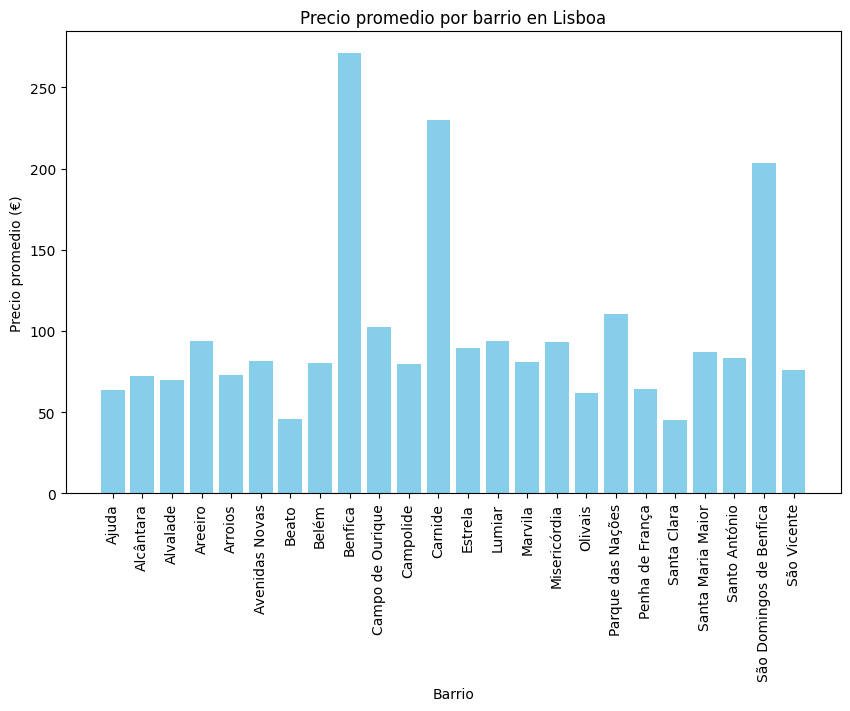

In [47]:
# Gráfico de barras: Precio promedio por barrio
plt.figure(figsize=(10,6))
plt.bar(group_by_neighborhood['neighborhood'], group_by_neighborhood['average_price'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Barrio')
plt.ylabel('Precio promedio (€)')
plt.title('Precio promedio por barrio en Lisboa')
plt.show()

In [36]:
# Gráfico de barras: Número de propiedades por tipo de habitación
plt.figure(figsize=(8,6))
sns.barplot(x='room_type', y='num_properties', data=group_by_room_type, palette='Set2')
plt.xlabel('Tipo de habitación')
plt.ylabel('Número de propiedades')
plt.title('Número de propiedades por tipo de habitación')
plt.show()

ModuleNotFoundError: No module named 'seaborn'